In [14]:
import data_functions as dat
import filter_functions as fil
import fitting_functions as fit
from math_functions import normalise, OD_calc
from plotting_functions import plot_scope
from scipy.integrate import simpson

import os

In [15]:
directory = r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA"
folder = "1901_unlocked_LP_p4GHz"

dir = os.path.join(directory, folder)

exts = ('avg.csv')
excs = ['.png']
refs_995 = ['995_solo']
refs_1550 = ['1550_solo']
refs = refs_995 + refs_1550
# polarisation for maximum and minimum absorption of both 1550 and 995 pulses
pol_1550 = ['280', '330']
pol_995 = ['40', '85']

In [16]:
# interogate directory to extract folder and file names
folder_list, file_list = dat.dir_interogate(path=dir, extensions=exts, exceptions=excs)
# create dictionary for indexing folders and files
fol_i = dat.make_index_dict(folder_list)
fil_i = [dat.make_index_dict(file_sub_list) for file_sub_list in file_list]
# assemble reference paths
ref_995_path = dat.search_paths(folder_list, file_list, include=refs_995)
ref_1550_path = dat.search_paths(folder_list, file_list, include=refs_1550)
ref_995_path_list = [os.path.join(dir, x) for x in ref_995_path]
ref_1550_path_list = [os.path.join(dir, x) for x in ref_1550_path]
# find polarisation numbers from reference file names
pols_995 = [dat.find_numbers(os.path.split(path)[1], '\d+') for path in ref_995_path]
pols_1550 = [dat.find_numbers(os.path.split(path)[1], '\d+') for path in ref_1550_path]
# extract excel data from the folders
data_path_list = dat.search_paths(folder_list, file_list, [exts[0]])
excel_sets = [[dat.open_excel(os.path.join(dir, data_path)) for data_path in data_paths] for data_paths in data_path_list]

In [17]:
# create dictionary for index of channel data
i = {'time': 0,
     'sp_trans': 1,
     'sp_ref': 2,
     'cp_trans': 3,
     'cp_ref': 4}
# make labels for the plots of said data
labels = {key:i[key] for key in i.keys() if key != 'time'}

In [18]:
# find index of the polarisation values
tpa_pol_1550 = [value for pol in pol_1550 for (key, value) in fol_i.items() if pol in key]
tpa_pol_995 = [value for pol in pol_995 for (key, value) in fol_i.items() if pol in key]
ref_pol_1550 = [value for pol in pol_1550 for (key, value) in fil_i[fol_i['1550_solo']].items() if pol in key]
ref_pol_995 = [value for pol in pol_995 for (key, value) in fil_i[fol_i['995_solo']].items() if pol in key]
# create dictionary for index of polarisation max / min - sp is for the folder index, rsp, rcp are for file indexing
p_i = {'tpa_sph': tpa_pol_1550[0],
       'tpa_spl': tpa_pol_1550[1],
       'max_sp': ref_pol_1550[0],
       'min_sp': ref_pol_1550[1],
       'max_cp': ref_pol_995[0],
       'min_cp': ref_pol_995[1]}

1550_solo


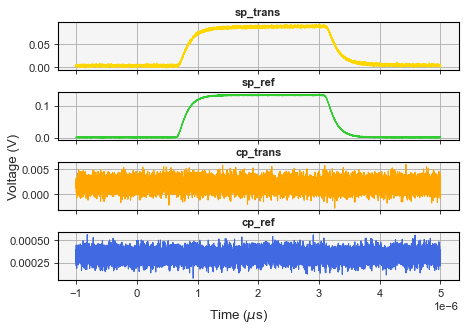

In [19]:
# plot 1550 reference data to check assignment
x = '1550_solo'
fol = fol_i[x]
fig, ax = plot_scope(excel_sets[fol][0][:,i['time']], [excel_sets[fol][0][:,i['sp_trans']], excel_sets[fol][0][:,i['sp_ref']], excel_sets[fol][0][:,i['cp_trans']], excel_sets[fol][0][:,i['cp_ref']]], titles=labels, multi=True)
print(x)

995_solo


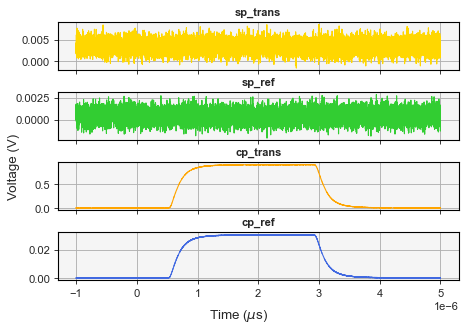

In [20]:
# plot 1550 reference data to check assignment
x = '995_solo'
fol = fol_i[x]
fig, ax = plot_scope(excel_sets[fol][0][:,i['time']], [excel_sets[fol][0][:,i['sp_trans']], excel_sets[fol][0][:,i['sp_ref']], excel_sets[fol][0][:,i['cp_trans']], excel_sets[fol][0][:,i['cp_ref']]], titles=labels, multi=True)
print(x)

1550_HWP_330


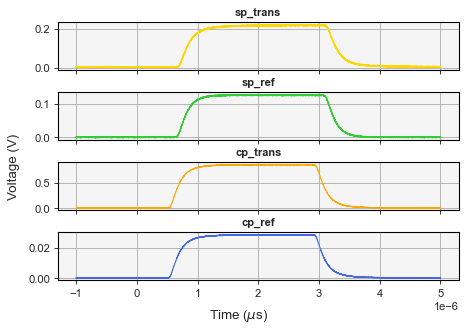

In [21]:
# plot 1550 reference data to check assignment
x = '1550_HWP_330'
fol = fol_i[x]
fig, ax = plot_scope(excel_sets[fol][0][:,i['time']], [excel_sets[fol][0][:,i['sp_trans']], excel_sets[fol][0][:,i['sp_ref']], excel_sets[fol][0][:,i['cp_trans']], excel_sets[fol][0][:,i['cp_ref']]], titles=labels, multi=True)
print(x)

1550_HWP_280


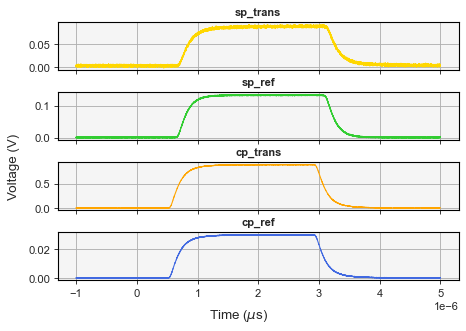

In [22]:
# plot 1550 reference data to check assignment
x = '1550_HWP_280'
fol = fol_i[x]
fig, ax = plot_scope(excel_sets[fol][0][:,i['time']], [excel_sets[fol][0][:,i['sp_trans']], excel_sets[fol][0][:,i['sp_ref']], excel_sets[fol][0][:,i['cp_trans']], excel_sets[fol][0][:,i['cp_ref']]], titles=labels, multi=True)
print(x)

In [23]:
# area for maximum sp and maximum cp polarisation
area_cph_sph = simpson(y=excel_sets[p_i['tpa_sph']][p_i['max_cp']][:,i['cp_trans']], x=excel_sets[p_i['tpa_sph']][p_i['max_cp']][:,i['time']])
area_cprh_sph = simpson(y=excel_sets[p_i['tpa_sph']][p_i['max_cp']][:,i['cp_ref']], x=excel_sets[p_i['tpa_sph']][p_i['max_cp']][:,i['time']])
# area for minimum sp and maximum cp polarisation
area_cph_spl = simpson(y=excel_sets[p_i['tpa_spl']][p_i['max_cp']][:,i['cp_trans']], x=excel_sets[p_i['tpa_spl']][p_i['max_cp']][:,i['time']])
area_cprh_spl = simpson(y=excel_sets[p_i['tpa_spl']][p_i['max_cp']][:,i['cp_ref']], x=excel_sets[p_i['tpa_spl']][p_i['max_cp']][:,i['time']])
# area for maximum sp and minimum cp polarisation
area_cpl_sph = simpson(y=excel_sets[p_i['tpa_sph']][p_i['min_cp']][:,i['cp_trans']], x=excel_sets[p_i['tpa_sph']][p_i['min_cp']][:,i['time']])
area_cprl_sph = simpson(y=excel_sets[p_i['tpa_sph']][p_i['min_cp']][:,i['cp_ref']], x=excel_sets[p_i['tpa_sph']][p_i['min_cp']][:,i['time']])
# area for minimum sp and minimum cp polarisation
area_cpl_spl = simpson(y=excel_sets[p_i['tpa_spl']][p_i['min_cp']][:,i['cp_trans']], x=excel_sets[p_i['tpa_spl']][p_i['min_cp']][:,i['time']])
area_cprl_spl = simpson(y=excel_sets[p_i['tpa_spl']][p_i['min_cp']][:,i['cp_ref']], x=excel_sets[p_i['tpa_spl']][p_i['min_cp']][:,i['time']])

In [24]:
# area for cp when only sp is present for maximum polarisation
area_sph_cp = simpson(y=excel_sets[fol_i['1550_solo']][p_i['max_sp']][:,i['cp_trans']], x=excel_sets[fol_i['1550_solo']][p_i['max_sp']][:,i['time']])
area_sph_cpr = simpson(y=excel_sets[fol_i['1550_solo']][p_i['max_sp']][:,i['cp_ref']], x=excel_sets[fol_i['1550_solo']][p_i['max_sp']][:,i['time']])
# area for cp when only sp is present for minimum polarisation
area_spl_cp = simpson(y=excel_sets[fol_i['1550_solo']][p_i['min_sp']][:,i['cp_trans']], x=excel_sets[fol_i['1550_solo']][p_i['min_sp']][:,i['time']])
area_spl_cpr = simpson(y=excel_sets[fol_i['1550_solo']][p_i['min_sp']][:,i['cp_ref']], x=excel_sets[fol_i['1550_solo']][p_i['min_sp']][:,i['time']])
# area for cp when only cp is present for maximum polarisation
area_cph_cp = simpson(y=excel_sets[fol_i['995_solo']][p_i['max_cp']][:,i['cp_trans']], x=excel_sets[fol_i['995_solo']][p_i['max_cp']][:,i['time']])
area_cph_cpr = simpson(y=excel_sets[fol_i['995_solo']][p_i['max_cp']][:,i['cp_ref']], x=excel_sets[fol_i['995_solo']][p_i['max_cp']][:,i['time']])
# area for cp when only cp is present for minimum polarisation
area_cpl_cp = simpson(y=excel_sets[fol_i['995_solo']][p_i['min_cp']][:,i['cp_trans']], x=excel_sets[fol_i['995_solo']][p_i['min_cp']][:,i['time']])
area_cpl_cpr = simpson(y=excel_sets[fol_i['995_solo']][p_i['min_cp']][:,i['cp_ref']], x=excel_sets[fol_i['995_solo']][p_i['min_cp']][:,i['time']])

In [25]:
# normalised pulse areas (sp_trans when cp on - leakage when only cp solo (sp_trans) / sp_ref when cp on)
norm = {'norm_cph_sph': normalise(area_cph_sph, area_cprh_sph, area_sph_cp),
        'norm_cph_spl': normalise(area_cph_spl, area_cprh_spl, area_spl_cp),
        'norm_cpl_sph': normalise(area_cpl_sph, area_cprl_sph, area_sph_cp),
        'norm_cpl_spl': normalise(area_cpl_spl, area_cprl_spl, area_spl_cp)}

dat.write_json(folder + '_norm_995_area.json', norm)

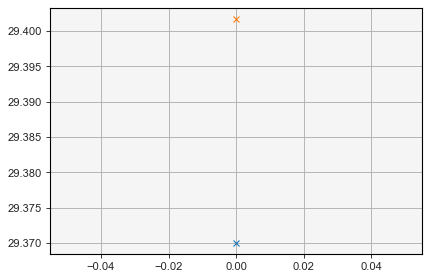

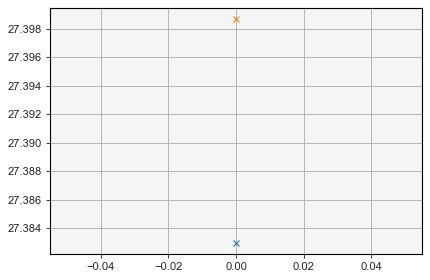

In [26]:
import matplotlib.pyplot as mp
mp.figure()
mp.plot(norm['norm_cph_sph'], 'x')
mp.plot(norm['norm_cph_spl'], 'x')
mp.figure()
mp.plot(norm['norm_cpl_sph'], 'x')
mp.plot(norm['norm_cpl_spl'], 'x')